# Distributions

QDFlow allows you to specify exactly how parameters are randomized.
This is done through the `Distribution` class.

Several basic distributions are provided (which are essentially wrappers of the
numpy random functions), and QDFlow also allows for the definition of custom
distributions if more complex behavior is needed.

In [1]:
import tutorial_helper
from qdflow.util import distribution
import numpy as np
import matplotlib.pyplot as plt

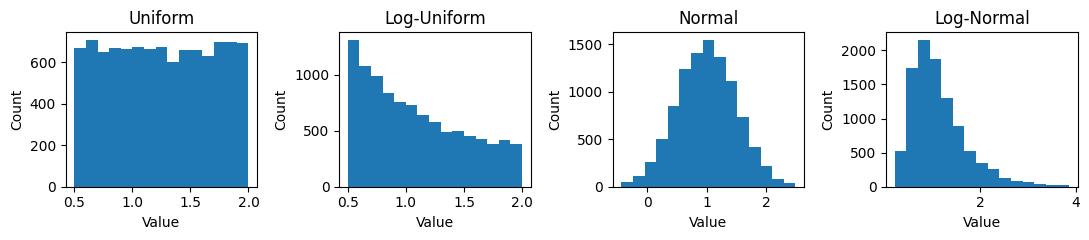

In [2]:
# Simple distributions built into QDFlow
uniform_dist = distribution.Uniform(0.5, 2)
log_uniform_dist = distribution.LogUniform(0.5, 2)
normal_dist = distribution.Normal(1, 0.5)
log_normal_dist = distribution.LogNormal(0, 0.5)

dists = [uniform_dist, log_uniform_dist, normal_dist, log_normal_dist]

num_samples = 10000 # How many times to sample from each distribution

rng = np.random.default_rng(seed=2)

# Sample from each distribution
samples = [dist.draw(rng, num_samples) for dist in dists]

# Plot results
fig, ax = plt.subplots(1, 4, figsize=(11,2.5))
for i in range(4):
    tutorial_helper.plot_dist_data(fig, ax[i], samples[i], bins=15)
    ax[i].set_title(["Uniform","Log-Uniform","Normal","Log-Normal"][i])
fig.tight_layout()

Distributions can be combined with basic arithmetic operations +, -, *, and /.
This has the effect of drawing from each distribution and performing the
arithmetic operation on the resulting values.
The absolute value can also be taken with `dist.abs()`.

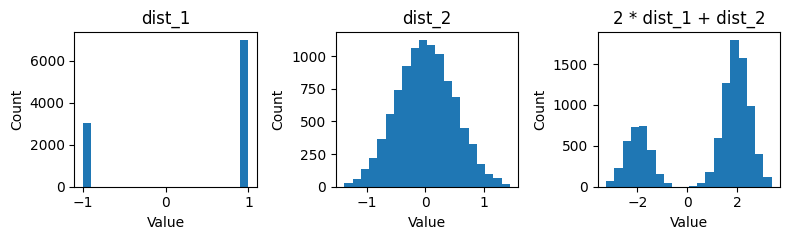

In [3]:
# Simple distributions built into QDFlow
dist_1 = distribution.Binary(.7, 1, -1)
dist_2 = distribution.Normal(0, 0.5)

# Define a new distribution by using arithmetic operators on the first two
dist_3 = 2 * dist_1 + dist_2

dists = [dist_1, dist_2, dist_3]

num_samples = 10000 # How many times to sample from each distribution

rng = np.random.default_rng(seed=3)

# Sample from each distribution
samples = [dist.draw(rng, num_samples) for dist in dists]

# Plot results
fig, ax = plt.subplots(1, 3, figsize=(8,2.5))
for i in range(3):
    tutorial_helper.plot_dist_data(fig, ax[i], samples[i], bins=20)
    ax[i].set_title(["dist_1","dist_2","2 * dist_1 + dist_2"][i])
fig.tight_layout()

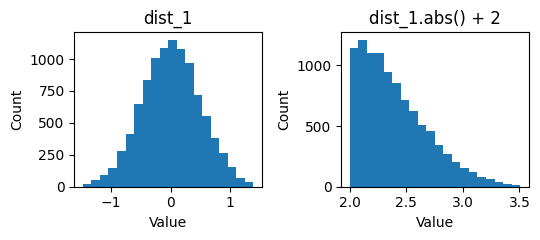

In [4]:
# Simple distribution built into QDFlow
dist_1 = distribution.Normal(0, 0.5)

# Define a new distribution by using arithmetic operators on the first one
dist_2 = dist_1.abs() + 2

dists = [dist_1, dist_2]

num_samples = 10000 # How many times to sample from each distribution

rng = np.random.default_rng(seed=4)

# Sample from each distribution
samples = [dist.draw(rng, num_samples) for dist in dists]

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(5.5,2.5))
for i in range(2):
    tutorial_helper.plot_dist_data(fig, ax[i], samples[i], bins=20)
    ax[i].set_title(["dist_1", "dist_1.abs() + 2"][i])
fig.tight_layout()